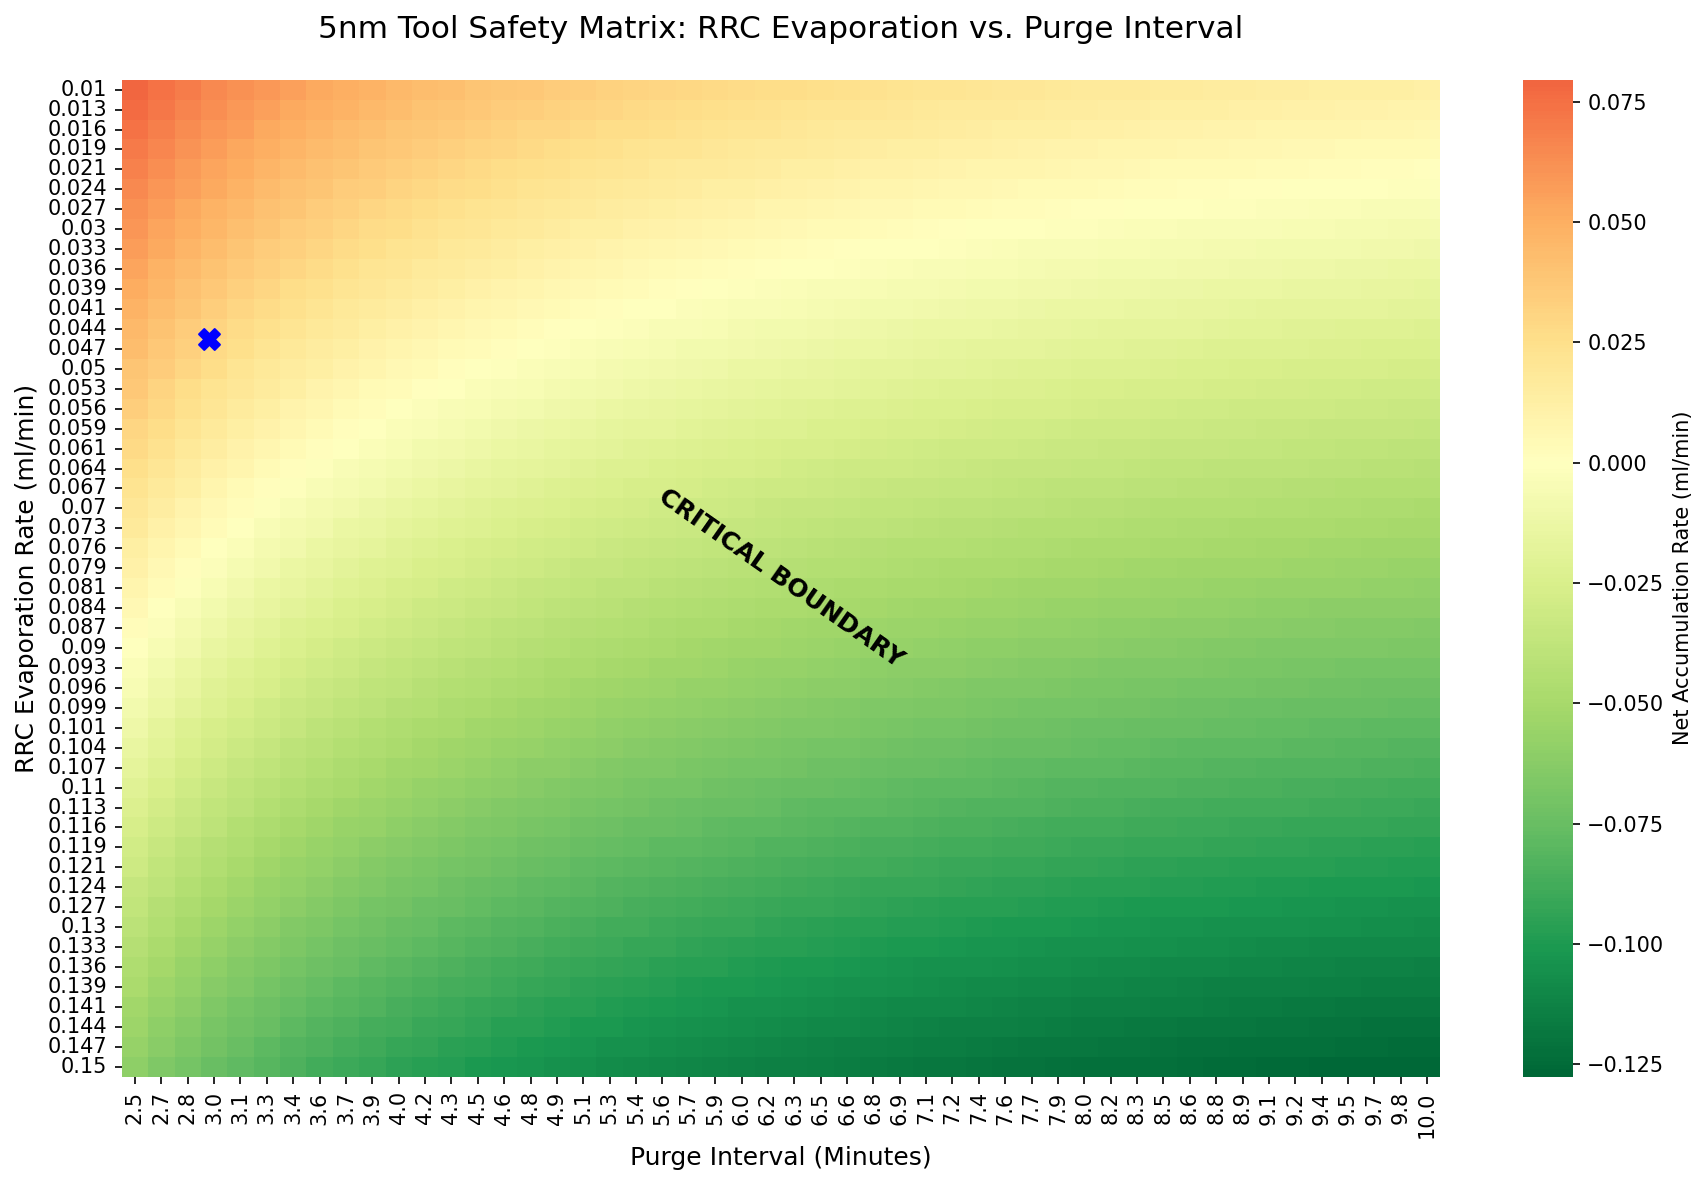

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_stability_heatmap():
    # Define ranges for the two key uncertain variables
    intervals = np.linspace(2.5, 10.0, 50)  # Purge Interval (min)
    evap_rates = np.linspace(0.01, 0.15, 50) # RRC Evaporation Rate (ml/min)
    
    # Assumed fixed leak based on back-pressure logic (~0.22ml per cycle)
    leak_per_cycle = 0.224 
    
    # Calculate Net Accumulation Rate: (Leak / Interval) - Evaporation
    # If the result > 0, the system is UNSTABLE (will leak)
    # If the result <= 0, the system is STABLE (liquid evaporates faster than it leaks)
    z = np.zeros((len(evap_rates), len(intervals)))
    
    for i, evap in enumerate(evap_rates):
        for j, interval in enumerate(intervals):
            net_rate = (leak_per_cycle / interval) - evap
            z[i, j] = net_rate

    # Create the plot
    plt.figure(figsize=(12, 8), dpi=150)
    
    # We use a diverging colormap: Cool (Safe) to Warm (Leak)
    # Center the colormap at 0 (the physical tipping point)
    ax = sns.heatmap(z, 
                     xticklabels=np.round(intervals, 1), 
                     yticklabels=np.round(evap_rates, 3),
                     cmap="RdYlGn_r", 
                     center=0,
                     cbar_kws={'label': 'Net Accumulation Rate (ml/min)'})

    # Beautify the heatmap
    plt.title("5nm Tool Safety Matrix: RRC Evaporation vs. Purge Interval", fontsize=15, pad=20)
    plt.xlabel("Purge Interval (Minutes)", fontsize=12)
    plt.ylabel("RRC Evaporation Rate (ml/min)", fontsize=12)
    
    # Add an annotation for the "Tipping Point" line (Zero Net Rate)
    # This line represents where Accumulation = Evaporation
    plt.text(25, 25, 'CRITICAL BOUNDARY', color='black', weight='bold', 
             fontsize=12, ha='center', va='center', rotation=-35)
    
    # Mark the specific Incident Case (3.0m interval)
    plt.scatter([3.3], [13], color='blue', s=100, marker='X', label='Incident Case (3m)')
    
    plt.tight_layout()
    plt.show()

analyze_stability_heatmap()